# Explanatory Data Analysis - Visualizing FordGo Bikes Data


## Karthick Pandi


### Introduction

Ford GoBike is a regional public bicycle sharing system in the San Francisco Bay Area, California. Beginning operation in August 2013 as Bay Area Bike Share, the Ford GoBike system currently has over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017, the system officially launched as Ford GoBike in a partnership with Ford Motor Company.

Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.

### Key Insights 

<ol>
<li>Whether Week days or Week end has more number of rides ? </li>
<li>Which user type plays a major role in FordGo Bikes ?</li>
<li>Among the three months which month has more rides ?</li>
<li>For what purpose those bikes are rented i,e) (Office vs Personal)</li>
</ol>


In [1]:
import pandas as pd
import glob 
import os
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import warnings
import numpy as np

In [5]:
df_clean = pd.read_csv('f.csv')


In [7]:
df_clean.head()

,bike_id,user_type,startdate,starttime,start_date,start_month,start_day,start_year,start_hour,enddate,...,duration_min,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude
0,10982,Customer,2020-03-31,20:42:10.07,31,Mar,Tuesday,2020,20,2020-04-01,...,586,35187.0,462.0,Cruise Terminal at Pier 27,37.804648,-122.402087,24.0,Spear St at Folsom St,37.789677,-122.390428
1,12617,Customer,2020-03-31,22:45:25.50,31,Mar,Tuesday,2020,22,2020-04-01,...,242,14568.0,42.0,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,370.0,Jones St at Post St,37.787327,-122.413278
2,12812,Customer,2020-03-31,15:08:22.33,31,Mar,Tuesday,2020,15,2020-04-01,...,599,35990.0,391.0,1st St at Younger Ave,37.355030,-121.904436,397.0,Gish Rd at 1st St,37.361867,-121.909315
3,12955,Customer,2020-03-31,23:55:00.42,31,Mar,Tuesday,2020,23,2020-04-01,...,17,1068.0,456.0,Arguello Blvd at Geary Blvd,37.781468,-122.458806,107.0,17th St at Dolores St,37.763015,-122.426497
4,13050,Customer,2020-03-31,23:00:55.64,31,Mar,Tuesday,2020,23,2020-03-31,...,55,3300.0,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,24.0,Spear St at Folsom St,37.789677,-122.390428


In [11]:
base_color = sns.color_palette()[0]

### 1)	Whether Week days or Week end has more number of rides ?

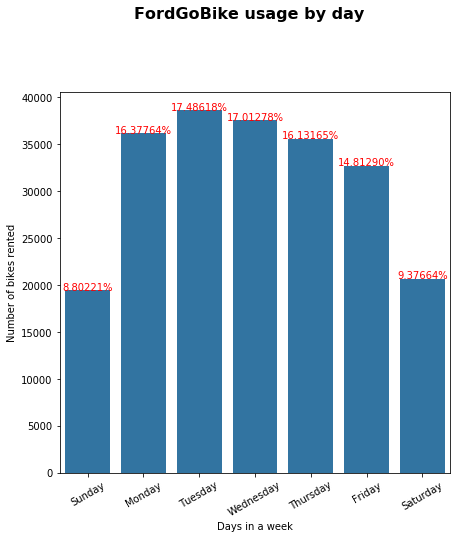

In [12]:
plt.figure(figsize=(7,7));
level_order1 = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
ordered_day = pd.api.types.CategoricalDtype(level_order1);
df_clean["start_day"] = df_clean["start_day"].astype(ordered_day);
sns.countplot(data=df_clean,x="start_day",color=base_color);
plt.xticks(rotation = 30);
plt.xlabel("Days in a week");
plt.ylabel("Number of bikes rented");
plt.suptitle('FordGoBike usage by day',y=1.05,fontsize=16,fontweight='bold');
n_points= df_clean.shape[0]
cat_counts = df_clean.start_day.value_counts()
locs, labels = plt.xticks()
for loc, label in zip(locs, labels):
    count = cat_counts[label.get_text()]
    pct_string = '{:1.5f}%'.format(100*count/n_points)
    plt.text(loc, count-5, pct_string, ha = 'center', color = 'r')

#### Observation

It is conclusive from the graph that more number of bikes has been rented on week days than in week ends. There might be possibilities like most of the bikes has been rented by the office proffesional on week days and also it is clear from the wikipedia info that the wheather is good on these months which makes the office proffessinal to prefer bikes.

### 2)	Which user type plays a major role in FordGo Bikes ?

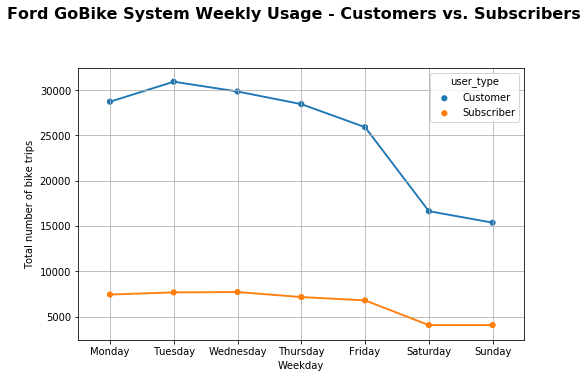

In [13]:
plt.figure(figsize=(8, 5))

df_clean_user_week = df_clean.groupby(['start_day', 'user_type']).size().reset_index()

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

ax = sns.pointplot(data=df_clean_user_week, x='start_day', y=0, hue = 'user_type', scale=.7, order = weekday);

plt.suptitle('Ford GoBike System Weekly Usage - Customers vs. Subscribers', y=1.05, fontsize=16, fontweight='bold');
plt.xlabel('Weekday')
plt.ylabel('Total number of bike trips');
plt.grid()

#### Observation


From the above pointplot we can conclude that Week end has encounters some drop when compared to Week days. On week days Customer has more than 50% in number (bike rides) when compared to user type Subscribers.

### 3)	Among the three months which month has more rides ?

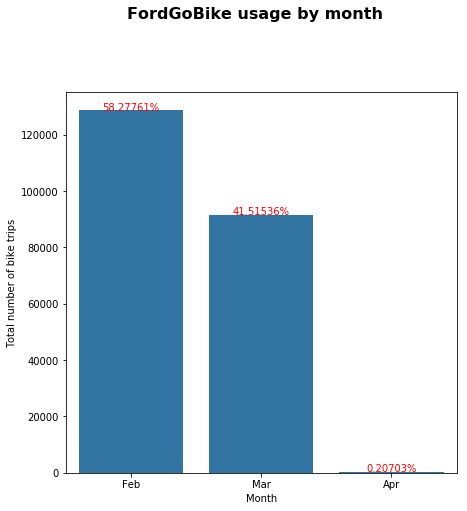

In [14]:
plt.figure(figsize=(7,7));
level_order = ["Feb","Mar","Apr"]
ordered_month = pd.api.types.CategoricalDtype(level_order);
df_clean["start_month"] = df_clean["start_month"].astype(ordered_month);
sns.countplot(data=df_clean,x="start_month",color=base_color);
plt.xlabel("Month");
plt.ylabel("Total number of bike trips");
plt.suptitle('FordGoBike usage by month',y=1.05,fontsize=16,fontweight='bold');
n_points= df_clean.shape[0]
cat_counts = df_clean.start_month.value_counts()
locs, labels = plt.xticks()
for loc, label in zip(locs, labels):
    count = cat_counts[label.get_text()]
    pct_string = '{:1.5f}%'.format(100*count/n_points)
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'r')

### Observation

It is evident from the above graph that February is the month where there are more number of bikes has been rented for the year 2020 and April places the last position in the number of bikes rented. As per the wikipedia info San fransisco bay area is more  sunnier in february  when compared to normal summer months.

### 4)	For what purpose those bikes are rented i,e) (Office vs Personal) 

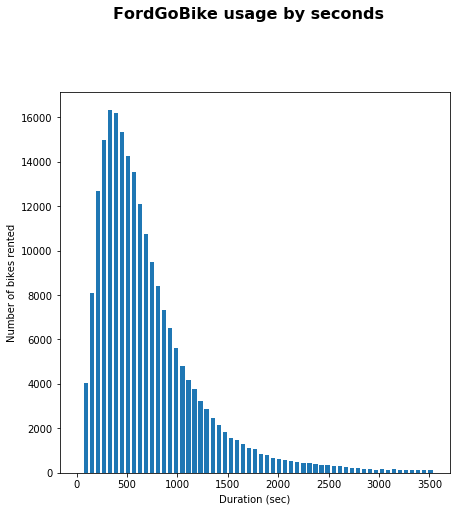

In [15]:
plt.figure(figsize=(7,7))
bin_edges = np.arange(0,3600,60)
plt.hist(data=df_clean,x="duration_sec",bins=bin_edges,rwidth=0.7);
plt.suptitle('FordGoBike usage by seconds',y=1.05,fontsize=16,fontweight='bold');
plt.xlabel("Duration (sec)")
plt.ylabel("Number of bikes rented");


### Observation

Looking at the histogram, we can see that trip durations are no longer than 30 min (1800 sec) and usually last 6 to 15 min.As it looks like people use the system for commuting, they trips are usually short in time probably due to the closeness of their homes to workplace.



### Summary and Findings

<ul>
<li>From this dataset we conclude that Week days has more number of rides when compared to week ends.</li>
<li>For the first two months Customers are high in number and for the last month Subscribers are high when compared to Customers. This implies FordGo bikes has launch some special schemes for increasing the Subscribers.</li>
<li>Most of the bikes has been rented for the purpose of office commute. This can be evident from the above plat like most of the bikes has been rented on 8 – 9 AM, and most of the rides has been completed within 30 minutes. This implies these bikes are not rented for any personal purposes.</li>
    </ul
